In [1]:
import pandas as pd
happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [2]:
display(happiness_df[['happiness_score','region']])
region_happiness = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(region_happiness)

,happiness_score,region
0,7.804,Western Europe
1,7.586,Western Europe
2,7.530,Western Europe
3,7.473,Middle East and North Africa
4,7.403,Western Europe
...,...,...
132,3.207,Sub-Saharan Africa
133,3.204,Sub-Saharan Africa
134,3.138,Sub-Saharan Africa
135,2.392,Middle East and North Africa


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


In [3]:
display(happiness_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [4]:
import numpy as np
from scipy.stats import iqr

# display(happiness_df.describe().T)

# happiness_Q1 = np.percentile(happiness_df.score, 25) # 하위 25프로
# happiness_Q3 = np.percentile(happiness_df.score, 75) # 상위 25프로
# print(happiness_Q1, happiness_Q3)

happiness_score_Q1 = happiness_df.describe().T.loc['happiness_score','25%']
happiness_score_Q3 = happiness_df.describe().T.loc['happiness_score','75%']
print(happiness_score_Q1, happiness_score_Q3)

iqr_value = happiness_score_Q3 - happiness_score_Q1
print(iqr_value)

# iqr_value = iqr(happiness_df.score)
# print(iqr_value)

lower_bound = happiness_score_Q1 - 1.5 * iqr_value # 최소
upper_bound = happiness_score_Q3 + 1.5 * iqr_value # 최대 
print(f'행복도 정상치의 범위 : {lower_bound} ~ {upper_bound}')

4.724 6.334
1.6099999999999994
행복도 정상치의 범위 : 2.309000000000001 ~ 8.748999999999999


In [6]:

social_result = happiness_df[happiness_df['social_support'] > 1.6]
#iceland가 사회적 지원이 가장 높다.
happy_result = happiness_df[happiness_df['happiness_score'] > 7.8]
# 행복도 도수가 가장 높은 나라는 Finland : 7.804
region_happiness = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(happy_result)
# North America and ANZ의 행복도가 가장 높다. : 7.018
display(region_happiness)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


In [7]:
# 대륙별 GDP 구하기 
region_mean_gdp_df = happiness_df.groupby('region').mean('gdp_per_capita').reset_index()
display(region_mean_gdp_df)

region_max_gdp_df = happiness_df.groupby('region').max('gdp_per_capita').reset_index()
display(region_max_gdp_df)

region_min_gdp_df = happiness_df.groupby('region').min('gdp_per_capita').reset_index()
display(region_min_gdp_df)

region_std_gdp_df = happiness_df.groupby('region')['gdp_per_capita'].std().reset_index()
display(region_std_gdp_df)

max_gdp_row = region_max_gdp_df.loc[region_mean_gdp_df['gdp_per_capita'].idxmax()]
max_gdp_region = max_gdp_row['region']
print("gdp가 가장 높은 region은", max_gdp_region, "입니다.")
# gdp 1 등 -> 서유럽 , 북아메리카, 동아시아, 중앙동유럽, 중앙동아프리카,
# 꼴등 -> 사하라 아프리카


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,gdp_per_capita
0,Central and Eastern Europe,0.158668
1,Commonwealth of Independent States,0.307401
2,East Asia,0.232407
3,Latin America and Caribbean,0.370272
4,Middle East and North Africa,0.285057
5,North America and ANZ,0.058095
6,South Asia,0.254881
7,Southeast Asia,0.354725
8,Sub-Saharan Africa,0.279963
9,Western Europe,0.118421


gdp가 가장 높은 region은 Western Europe 입니다.


In [8]:
# display(happiness_df.describe().T)

happiness_gdp_Q1 = np.percentile(happiness_df.gdp_per_capita, 25) # 하위 25프로
happiness_gdp_Q3 = np.percentile(happiness_df.gdp_per_capita, 75) # 상위 25프로
print(happiness_gdp_Q1, happiness_gdp_Q3)

iqr_value = iqr(happiness_df.gdp_per_capita	)
print(iqr_value)

lower_bound = happiness_gdp_Q1 - 1.5 * iqr_value # 최소
upper_bound = happiness_gdp_Q3 + 1.5 * iqr_value # 최대 
print(f'gdp 정상치의 범위 : {lower_bound} ~ {upper_bound}')

1.099 1.798
0.6990000000000001
gdp 정상치의 범위 : 0.05049999999999977 ~ 2.8465000000000003


In [9]:
happiness_free_Q1 = np.percentile(happiness_df.freedom_to_make_life_choices, 25)
happiness_free_Q3 = np.percentile(happiness_df.freedom_to_make_life_choices, 75)
print(happiness_free_Q1,happiness_free_Q3)
iqr_value = iqr(happiness_df.freedom_to_make_life_choices)
print(iqr_value)

lower_bound = happiness_free_Q1 - 1.5 * iqr_value # 최소
upper_bound = happiness_free_Q3 + 1.5 * iqr_value # 최대 
print(f'선택 자유도 정상치의 범위 : {lower_bound} ~ {upper_bound}')

0.455 0.656
0.201
선택 자유도 정상치의 범위 : 0.15350000000000003 ~ 0.9575


In [10]:
# display(happiness_df[['happiness_score','social_support']])
# region_happiness = happiness_df.groupby('social_support').mean('happiness_score').reset_index()
# display(region_happiness)

# region_happiness = happiness_df.groupby('region').mean('happiness_score').reset_index()
# region_happiness_max = happiness_df.groupby('region').max('happiness_score').reset_index()
# region_happiness_min = happiness_df.groupby('region').min('happiness_score').reset_index()
# display(region_happiness)
# display(region_happiness_max)
# social_result = happiness_df[happiness_df['social_support'] > 1.6]
# free_happiness = happiness_df.groupby('freedom_to_make_life_choices').mean('happiness_score').reset_index()
# display(free_happiness)
#---------1차 추출-----------------------------
# 가장 행복도가 높은 대륙은 북아메리카,AMZ이다.
# 사회적 지원이 높을수록 행복도 차이와 연관이 없다.
# gdp가 높아질 수록 행복도 차이와 연관이 없다.
#-------------2차 추출 --------------------------
# 선택 자유도가 높을 수록 행복도가 높아지는 것을 알 수 있다. 
# 실제로 선택자유도를 GroupBy해서 행복도의 평균값과 최대값을 조사한 결과, 
#선택의 자유가 높은 나라 및 대륙 에서 행복도가 높다는 것을 알 수 있다.

In [11]:
free_mean_df = happiness_df.groupby('freedom_to_make_life_choices').mean('happiness_score').reset_index()
display(free_mean_df)

free_min_df = happiness_df.groupby('freedom_to_make_life_choices').min('happiness_score').reset_index()
display(free_min_df)

free_max_df = happiness_df.groupby('freedom_to_make_life_choices').max('happiness_score').reset_index()
display(free_max_df)

free_std_df = happiness_df.groupby('freedom_to_make_life_choices')['happiness_score'].std().reset_index()
display(free_std_df)

,freedom_to_make_life_choices,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,generosity,perceptions_of_corruption
0,0.000,1.859,0.645,0.000,0.087,0.093,0.059
1,0.117,3.545,0.914,0.327,0.215,0.129,0.145
2,0.123,2.392,1.417,0.476,0.398,0.061,0.027
3,0.125,4.614,1.714,1.148,0.467,0.095,0.096
4,0.187,4.019,0.632,0.779,0.178,0.177,0.134
...,...,...,...,...,...,...,...
111,0.748,6.173,1.883,1.269,0.389,0.199,0.138
112,0.752,7.315,1.994,1.521,0.544,0.212,0.463
113,0.754,7.395,1.921,1.510,0.562,0.225,0.520
114,0.768,4.393,1.025,1.024,0.283,0.176,0.051


,freedom_to_make_life_choices,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,generosity,perceptions_of_corruption
0,0.000,1.859,0.645,0.000,0.087,0.093,0.059
1,0.117,3.545,0.914,0.327,0.215,0.129,0.145
2,0.123,2.392,1.417,0.476,0.398,0.061,0.027
3,0.125,4.614,1.714,1.148,0.467,0.095,0.096
4,0.187,4.019,0.632,0.779,0.178,0.177,0.134
...,...,...,...,...,...,...,...
111,0.748,6.173,1.883,1.269,0.389,0.199,0.138
112,0.752,7.315,1.994,1.521,0.544,0.212,0.463
113,0.754,7.395,1.921,1.510,0.562,0.225,0.520
114,0.768,4.393,1.025,1.024,0.283,0.176,0.051


,freedom_to_make_life_choices,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,generosity,perceptions_of_corruption
0,0.000,1.859,0.645,0.000,0.087,0.093,0.059
1,0.117,3.545,0.914,0.327,0.215,0.129,0.145
2,0.123,2.392,1.417,0.476,0.398,0.061,0.027
3,0.125,4.614,1.714,1.148,0.467,0.095,0.096
4,0.187,4.019,0.632,0.779,0.178,0.177,0.134
...,...,...,...,...,...,...,...
111,0.748,6.173,1.883,1.269,0.389,0.199,0.138
112,0.752,7.315,1.994,1.521,0.544,0.212,0.463
113,0.754,7.395,1.921,1.510,0.562,0.225,0.520
114,0.768,4.393,1.025,1.024,0.283,0.176,0.051


,freedom_to_make_life_choices,happiness_score
0,0.000,NaN
1,0.117,NaN
2,0.123,NaN
3,0.125,NaN
4,0.187,NaN
...,...,...
111,0.748,NaN
112,0.752,NaN
113,0.754,NaN
114,0.768,NaN


In [12]:
region_mean_df = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(region_mean_df)

region_min_df = happiness_df.groupby('region').min('happiness_score').reset_index()
display(region_min_df)

region_max_df = happiness_df.groupby('region').max('happiness_score').reset_index()
display(region_max_df)

region_std_df = happiness_df.groupby('region')['happiness_score'].std().reset_index()
display(region_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,1.180692
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


In [13]:
region_perception_mean_df = happiness_df.groupby('region').mean('perceptions_of_corruption').reset_index()
region_perception_min_df = happiness_df.groupby('region').min('perceptions_of_corruption').reset_index()
region_perception_max_df = happiness_df.groupby('region').max('perceptions_of_corruption').reset_index()
region_perception_std_df = happiness_df.groupby('region')['perceptions_of_corruption'].std().reset_index()
display(region_perception_mean_df)
display(region_perception_min_df)
display(region_perception_max_df)
display(region_perception_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,perceptions_of_corruption
0,Central and Eastern Europe,0.085096
1,Commonwealth of Independent States,0.115226
2,East Asia,0.110101
3,Latin America and Caribbean,0.068687
4,Middle East and North Africa,0.074270
5,North America and ANZ,0.124363
6,South Asia,0.034990
7,Southeast Asia,0.163340
8,Sub-Saharan Africa,0.060644
9,Western Europe,0.168664


In [14]:
happiness_perception_Q1 = np.percentile(happiness_df.perceptions_of_corruption, 25)
happiness_perception_Q3 = np.percentile(happiness_df.perceptions_of_corruption, 75)
print(happiness_perception_Q1,happiness_perception_Q3)
iqr_value = iqr(happiness_df.perceptions_of_corruption)
print(iqr_value)

lower_bound = happiness_perception_Q1 - 1.5 * iqr_value # 최소
upper_bound = happiness_perception_Q3 + 1.5 * iqr_value # 최대 
print(f'부패 인식도 정상치의 범위 : {lower_bound} ~ {upper_bound}')

0.06 0.187
0.127
부패 인식도 정상치의 범위 : -0.1305 ~ 0.3775


#### 2023 대륙별 행복도 조사 결과
- 부패 인식의 척도가 높을 수록 대륙별 행복도 지수가 높은 것을 알 수 있다.

In [15]:
region_happy_mean_df = happiness_df.groupby('region').mean('happiness_score').reset_index()
region_happy_min_df = happiness_df.groupby('region').min('happiness_score').reset_index()
region_happy_max_df = happiness_df.groupby('region').max('happiness_score').reset_index()
region_happy_std_df = happiness_df.groupby('region')['happiness_score'].std().reset_index()
display(region_happy_std_df)
display(region_happy_mean_df)
display(region_happy_min_df)
display(region_happy_max_df)

,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,1.180692
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

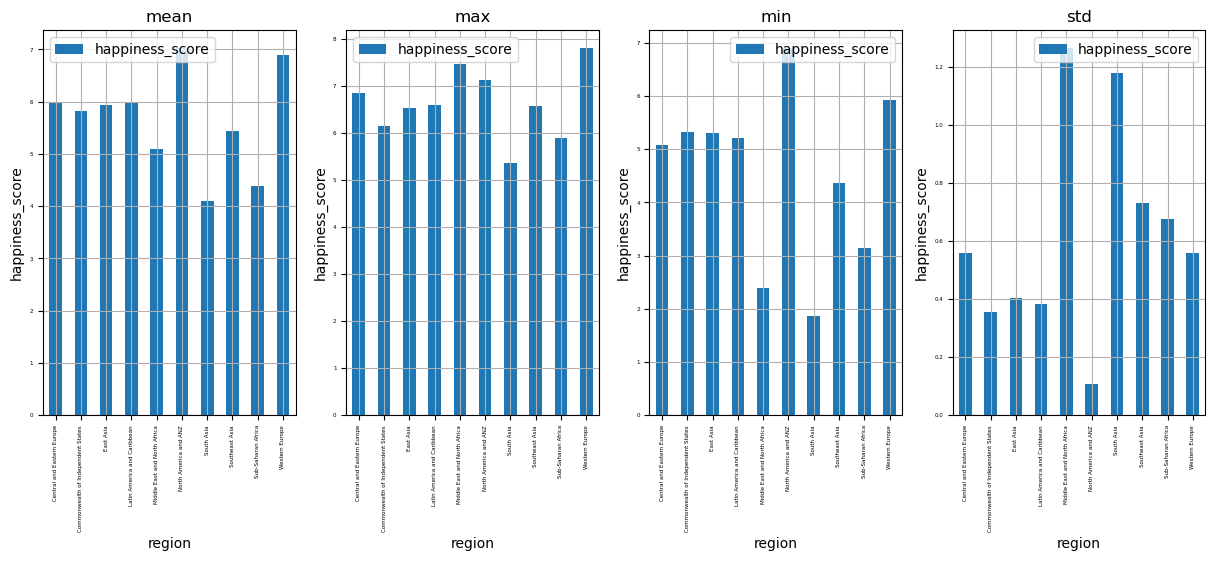

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="happiness_score")
region_happy_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
region_happy_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="happiness_score")
region_happy_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="happiness_score")
# region_happy_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='line', grd=True, ax=axes[2], ylabel="happiness_score")
# happiness_max_df.plot(title='max', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="score")
# happiness_std_df.plot(title='std', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="score")


### ❤️ 2023 지역별 행복도 조사 보고서 
#### 📊 행복도 분석 결과  

##### 행복도 지수 정상치 범위 : 2.309 ~ 8.749  

#### 📌 지역별 행복도 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 행복도 분석 결과 평균적으로 북아메리카가 "7.01"로 가장 높았고, 그 다음으로 서유럽이 "6.89"로 높은 것을 알 수 있습니다.
- 가장 행복도 지수 평균이 낮은 지역은 남아시아로 행복지수가 "4.09"이며, 그 다음으로 행복도가 낮은 대륙은 사하라 이남 아프리카이고, 행복지수가 "4.38"로 나왔습니다.

#### 📌 지역별 행복도 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 행복도의 최대값 분석 결과로는 서유럽이 "7.80"로 가장 높았고, 이 "7.80"이라는 행복지수의 국가는 핀란드인 것을 알 수 있었습니다.
- 반면 행복도 지수의 최소값이 가장 낮은 지역은 남아시아 였으며 "1.86"의 결과값이 나왔습니다. 이 "1.86"이라는 행복지수의 국가는 아프가니스탄이라는 것을 알 수 있었습니다.
  
#### 📌 지역별 행복도 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 행복도 분석 결과중 표준편차가 가장 높게 나온 지역은 중동과 북아프리카 지역 이였으며, 표준편차값(std)이  "1.26"이 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 동남아시아 이며, "1.18"이라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역이며, 표준편차 값은	"0.109"이 나왔습니다.


In [17]:
top_happy = happiness_df[happiness_df['happiness_score'] > 7.8]
# 행복도 도수가 가장 높은 나라는 Finland : 7.804
bottom_happy = happiness_df[happiness_df['happiness_score'] < 1.9]
# 행복도 도수가 가장 낮은 나라는 Afghanistan : 1.859
display(top_happy)
# North America and ANZ의 행복도가 가장 높다. : 7.018
display(bottom_happy)


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
136,Afghanistan,South Asia,1.859,0.645,0.0,0.087,0.0,0.093,0.059


<Axes: title={'center': 'std'}, xlabel='region', ylabel='gdp_per_capita'>

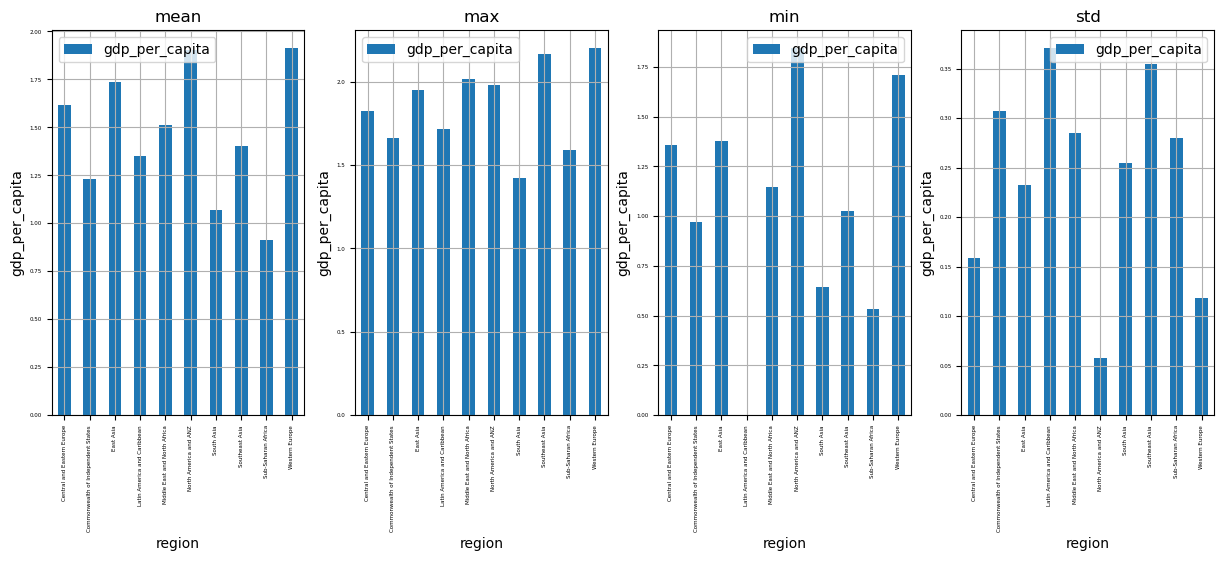

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_mean_gdp_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="gdp_per_capita")
region_max_gdp_df.plot(title='max', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="gdp_per_capita")
region_min_gdp_df.plot(title='min', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="gdp_per_capita")
region_std_gdp_df.plot(title='std', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="gdp_per_capita")
# happiness_max_df.plot(title='max', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="score")
# happiness_std_df.plot(title='std', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="score")

### 💰2023 지역별 GDP(1인당 국내 총생산) 보고서 
#### 📊 GDP 분석 결과  

##### GDP 정상치 범위 : 0.05 ~ 2.84

#### 📌 지역별 GDP 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 평균 GDP 분석 결과 가장 높게 나온 2개 지역들은 서유럽 "1.91"로 가장 높았고, 그 다음으로 북미 지역 & 오세아니아 지역이 "1.9"으로 높게 나왔습니다.
- 가장 지역별 GDP 평균이 낮은 지역은 사하라 이남 아프리카 지역으로 GDP 통계로 "0.91"이 나왔으며, 그 다음으로 GDP 평균이 낮은 지역은 동남 아시아이고, GDP 통계가 "1.06"으로 나왔습니다.

#### 📌 지역별 GDP 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 GDP 통계의 최대값 분석 결과로는 서유럽이 "2.2"로 가장 높았고, 이 "2.2"이라는 GDP의 국가는 룩셈부르크인 것을 알 수 있었습니다.
- 반면 GDP 통계의 최소값이 가장 낮은 지역은 라틴아메리카,카리브해 지역이였으며 "0.00"의 결과값이 나왔습니다. 이 "0.00"이라는 GDP의 국가는 베네수엘라 인 것을 데이터 분석을 통해 알 수 있었습니다.
  
#### 📌 지역별 GDP 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 GDP 분석 결과중 표준편차가 가장 높게 나온 지역은 라틴아메리카,카리브해 지역 이였으며, 표준편차값(std)이  "0.37"이 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 서남아시아 이며, "0.35"라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역 & 오세아니아 지역이며, 표준편차 값은	"0.05"가 나왔으며, 그 다음으로 낮게 나온 지역은 서유럽으로 표준편차 값이 "0.12"가 나왔습니다.


In [88]:
top_happy = happiness_df[happiness_df['gdp_per_capita'] > 2]
# GDP가 가장 높은 나라는 룩셈부르크: 2.200
bottom_happy = happiness_df[happiness_df['gdp_per_capita'] < 0.05]
# GDP가 가장 낮은 나라는 Venezuela : 0.00
top_social = happiness_df[happiness_df['social_support'] > 1.6]
# 사회적 지지가 가장 높은 나라는 아이슬란드 -> 1.62
bottom_social = happiness_df[happiness_df['social_support'] < 0.1]
# 사회적 지지가 가장 낮은 나라는 아프가니스탄 -> 0.0
display(top_social)
display(bottom_social)
display(top_happy)
display(bottom_happy)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Iceland,Western Europe,7.53,1.926,1.62,0.559,0.738,0.25,0.187


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
136,Afghanistan,South Asia,1.859,0.645,0.0,0.087,0.0,0.093,0.059


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
13,Ireland,Western Europe,6.911,2.152,1.425,0.539,0.656,0.186,0.409
24,Singapore,Southeast Asia,6.587,2.168,1.354,0.607,0.660,0.170,0.561
25,United Arab Emirates,Middle East and North Africa,6.571,2.015,1.223,0.401,0.745,0.188,0.247


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
87,Venezuela,Latin America and Caribbean,5.211,0.0,1.257,0.341,0.369,0.205,0.084


Text(1.7, 1.1, 'Happiness Average')

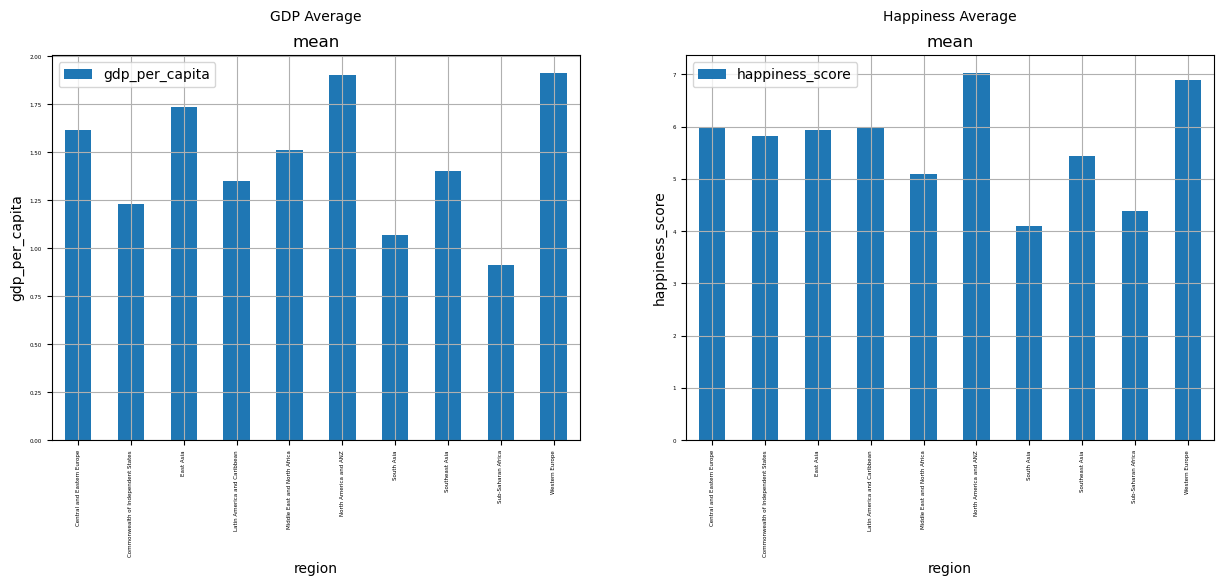

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

region_mean_gdp_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="gdp_per_capita")
axes[0].text(0.5, 1.10, 'GDP Average', ha='center', va='center', transform=axes[0].transAxes)

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
axes[0].text(1.7, 1.10, 'Happiness Average', ha='center', va='center', transform=axes[0].transAxes)
# region_min_gdp_df.plot(title='min', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="gdp_per_capita")
# region_std_gdp_df.plot(title='std', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="gdp_per_capita")
# happiness_max_df.plot(title='max', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="score")
# happiness_std_df.plot(title='std', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="score")

#### 지역별 평균 GDP 통계량 & 지역별 평균 행복도 통계량 시각화 그래프

### 📈 2023 지역별 평균 GDP 통계에 따른 행복도 조사 보고서  
- 지역별 GDP 데이터와 지역별 행복도 데이터를 분석 결과 지역별 GDP가 높을 수록 지역별 행복도도 높아진다는 것을
  평균값으로 데이터를 추출해보니 알 수 있 게 되었다.

- 위 그래프를 보면 GDP 평균이 가장 높은 지역은 서유럽,북아메리카 지역 및 오세아니아 이며, 지역별 행복도 또한 서유럽과 북아메리카 지역 & 오세아니아 지역이 가장 높은 것을 볼 수 있다. 반면에 GDP 평균이 가장 낮은 지역인 사하라 이남 아프리카 지역과 동남 아시아 지역 또한 지역별 행복도에서도 마찬가지로 최하위 2개 지역으로 통계가 나왔다.

- 따라서 주어진 통계 자료를 종합해보면, 경제적 발전 수준이 높은 지역에서는 행복도도 높을 것으로 예상되며, 경제적으로 발전이 덜 된 지역에서는 행복도가 낮을 것으로 판단됩니다. 이는 경제와 행복도 사이에 어느 정도의 관련성이 있음을 시사합니다.

In [20]:
region_free_mean_df = happiness_df.groupby('region').mean('freedom_to_make_life_choices').reset_index()
display(region_free_mean_df)

region_free_max_df = happiness_df.groupby('region').max('freedom_to_make_life_choices').reset_index()
display(region_free_max_df)

region_free_min_df = happiness_df.groupby('region').min('freedom_to_make_life_choices').reset_index()
display(region_free_min_df)

region_free_std_df = happiness_df.groupby('region')['freedom_to_make_life_choices'].std().reset_index()
display(region_free_std_df)

display(region_free_mean_df)
display(region_free_max_df)
display(region_free_min_df)
display(region_free_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,freedom_to_make_life_choices
0,Central and Eastern Europe,0.076836
1,Commonwealth of Independent States,0.072592
2,East Asia,0.101080
3,Latin America and Caribbean,0.076551
4,Middle East and North Africa,0.211375
5,North America and ANZ,0.056383
6,South Asia,0.246151
7,Southeast Asia,0.090150
8,Sub-Saharan Africa,0.107166
9,Western Europe,0.129057


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
4,Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.205,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.211,0.000,1.044,0.310,0.369,0.065,0.027
4,Middle East and North Africa,2.392,1.144,0.476,0.324,0.123,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.242,0.000,0.117,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,freedom_to_make_life_choices
0,Central and Eastern Europe,0.076836
1,Commonwealth of Independent States,0.072592
2,East Asia,0.101080
3,Latin America and Caribbean,0.076551
4,Middle East and North Africa,0.211375
5,North America and ANZ,0.056383
6,South Asia,0.246151
7,Southeast Asia,0.090150
8,Sub-Saharan Africa,0.107166
9,Western Europe,0.129057


<Axes: title={'center': 'std'}, xlabel='region', ylabel='freedom_to_make_life_choices'>

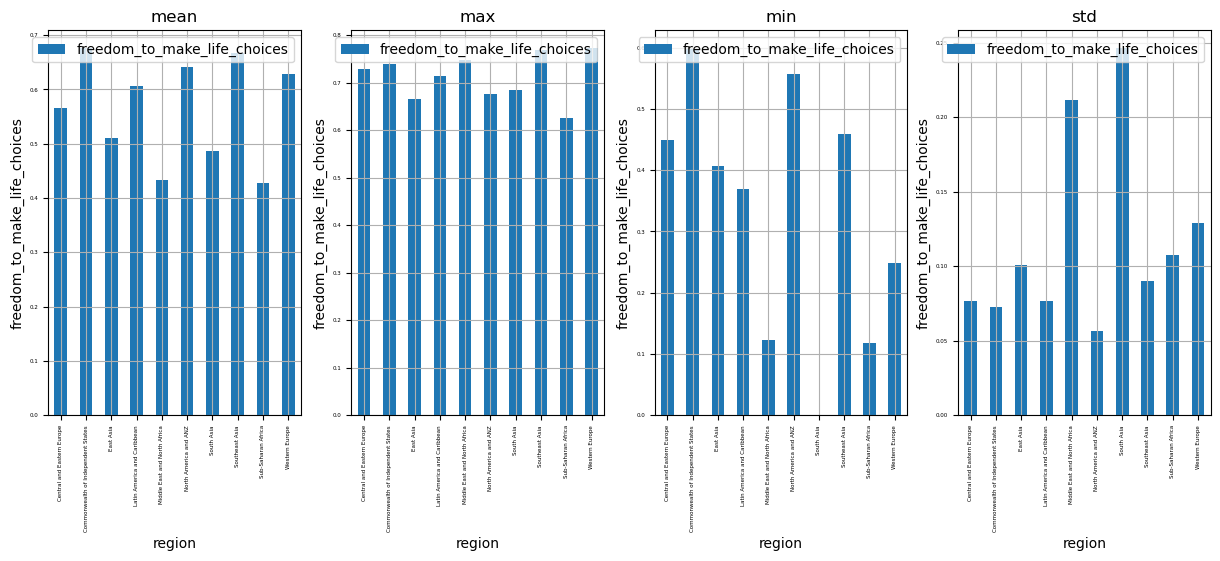

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_free_mean_df.plot(title='mean', x='region', y='freedom_to_make_life_choices', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="freedom_to_make_life_choices")
region_free_max_df.plot(title='max', x='region', y='freedom_to_make_life_choices', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="freedom_to_make_life_choices")
region_free_min_df.plot(title='min', x='region', y='freedom_to_make_life_choices', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="freedom_to_make_life_choices")
region_free_std_df.plot(title='std', x='region', y='freedom_to_make_life_choices', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="freedom_to_make_life_choices")
# happiness_max_df.plot(title='max', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="score")
# happiness_std_df.plot(title='std', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="score")

In [58]:
happiness_df.isna().sum()
happiness_df['healthy_life_expectancy'].value_counts()
# 결측치가 있는 행 제거
happiness_df.dropna(subset=['healthy_life_expectancy'], inplace=True)

# 결측치를 평균값으로 대체
mean_healthy_life_expectancy = happiness_df['healthy_life_expectancy'].mean()
result = happiness_df['healthy_life_expectancy'].fillna(mean_healthy_life_expectancy, inplace=True)
display(happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [63]:
region_happiness = happiness_df.groupby('region')['happiness_score'].mean().reset_index()
region_social = happiness_df.groupby('region')['social_support'].mean().reset_index()

display(region_happiness)
display(region_social)

,region,happiness_score
0,Central and Eastern Europe,5.967091
1,Commonwealth of Independent States,5.828250
2,East Asia,5.930167
3,Latin America and Caribbean,5.966053
4,Middle East and North Africa,5.117077
5,North America and ANZ,7.018250
6,South Asia,4.089000
7,Southeast Asia,5.431222
8,Sub-Saharan Africa,4.382485
9,Western Europe,6.894350


,region,social_support
0,Central and Eastern Europe,1.361545
1,Commonwealth of Independent States,1.381250
2,East Asia,1.316667
3,Latin America and Caribbean,1.260000
4,Middle East and North Africa,1.063692
5,North America and ANZ,1.496250
6,South Asia,0.682500
7,Southeast Asia,1.149333
8,Sub-Saharan Africa,0.812788
9,Western Europe,1.434950


In [71]:
# social_support의 평균값이 가장 높은 지역 찾기
max_social_region = region_social.loc[region_social['social_support'].idxmax(), 'region']
print("social_support의 평균값이 가장 높은 region은", max_social_region, "입니다.")

# happiness_score의 평균값이 가장 높은 지역 찾기
max_happiness_region = region_happiness.loc[region_happiness['happiness_score'].idxmax(), 'region']
print("happiness_score의 평균값이 가장 높은 region은", max_happiness_region, "입니다.")

# 평균값이 가장 높은 지역을 제외한 나머지 지역들의 평균값을 구합니다.
region_social_sorted = region_social.sort_values(by='social_support', ascending=False)
second_max_social_region = region_social_sorted.iloc[1]['region']

region_happiness_sorted = region_happiness.sort_values(by='happiness_score', ascending=False)
second_max_happiness_region = region_happiness_sorted.iloc[1]['region']

print("social_support의 두 번째로 높은 region은", second_max_social_region, "입니다.")
print("happiness_score의 두 번째로 높은 region은", second_max_happiness_region, "입니다.")


display(max_social_region_rows)


social_support의 평균값이 가장 높은 region은 North America and ANZ 입니다.
happiness_score의 평균값이 가장 높은 region은 North America and ANZ 입니다.
social_support의 두 번째로 높은 region은 Western Europe 입니다.
happiness_score의 두 번째로 높은 region은 Western Europe 입니다.


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471
11,Australia,North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
12,Canada,North America and ANZ,6.961,1.881,1.484,0.541,0.656,0.218,0.364
14,United States,North America and ANZ,6.894,1.980,1.460,0.390,0.557,0.210,0.172


In [72]:
# 사회적 지원과 행복도의 연관성 발견 

import numpy as np
from scipy.stats import iqr

# display(happiness_df.describe().T)

happiness_social_Q1 = np.percentile(happiness_df.social_support, 25) # 하위 25프로
happiness_social_Q3 = np.percentile(happiness_df.social_support, 75) # 상위 25프로
print(happiness_social_Q1, happiness_social_Q3)

iqr_value = iqr(happiness_df.social_support	)
print(iqr_value)

lower_bound = happiness_social_Q1 - 1.5 * iqr_value # 최소
upper_bound = happiness_social_Q3 + 1.5 * iqr_value # 최대 
print(f'사회적 지원 정상치의 범위 : {lower_bound} ~ {upper_bound}')

0.95975 1.40125
0.4415000000000001
사회적 지원 정상치의 범위 : 0.29749999999999976 ~ 2.0635000000000003


In [80]:
region_social_mean_df = happiness_df.groupby('region')['social_support'].mean().reset_index()


region_social_max_df = happiness_df.groupby('region')['social_support'].max().reset_index()


region_social_min_df = happiness_df.groupby('region')['social_support'].min().reset_index()


region_social_std_df = happiness_df.groupby('region')['social_support'].std().reset_index()


display(region_social_mean_df)
display(region_social_max_df)
display(region_social_min_df)
display(region_social_std_df)

,region,social_support
0,Central and Eastern Europe,1.361545
1,Commonwealth of Independent States,1.381250
2,East Asia,1.316667
3,Latin America and Caribbean,1.260000
4,Middle East and North Africa,1.063692
5,North America and ANZ,1.496250
6,South Asia,0.682500
7,Southeast Asia,1.149333
8,Sub-Saharan Africa,0.812788
9,Western Europe,1.434950


,region,social_support
0,Central and Eastern Europe,1.544
1,Commonwealth of Independent States,1.491
2,East Asia,1.494
3,Latin America and Caribbean,1.445
4,Middle East and North Africa,1.521
5,North America and ANZ,1.544
6,South Asia,1.224
7,Southeast Asia,1.354
8,Sub-Saharan Africa,1.428
9,Western Europe,1.620


,region,social_support
0,Central and Eastern Europe,0.947
1,Commonwealth of Independent States,1.248
2,East Asia,1.188
3,Latin America and Caribbean,1.044
4,Middle East and North Africa,0.476
5,North America and ANZ,1.460
6,South Asia,0.000
7,Southeast Asia,0.853
8,Sub-Saharan Africa,0.242
9,Western Europe,1.224


,region,social_support
0,Central and Eastern Europe,0.178881
1,Commonwealth of Independent States,0.106940
2,East Asia,0.122732
3,Latin America and Caribbean,0.117720
4,Middle East and North Africa,0.301850
5,North America and ANZ,0.035331
6,South Asia,0.425949
7,Southeast Asia,0.154091
8,Sub-Saharan Africa,0.261085
9,Western Europe,0.101683


In [ ]:
# 첫번째 -> 행복도, 사회적 지원 연관성 -> 행복도, GDP 연관성

<Axes: title={'center': 'std'}, xlabel='region', ylabel='social_support'>

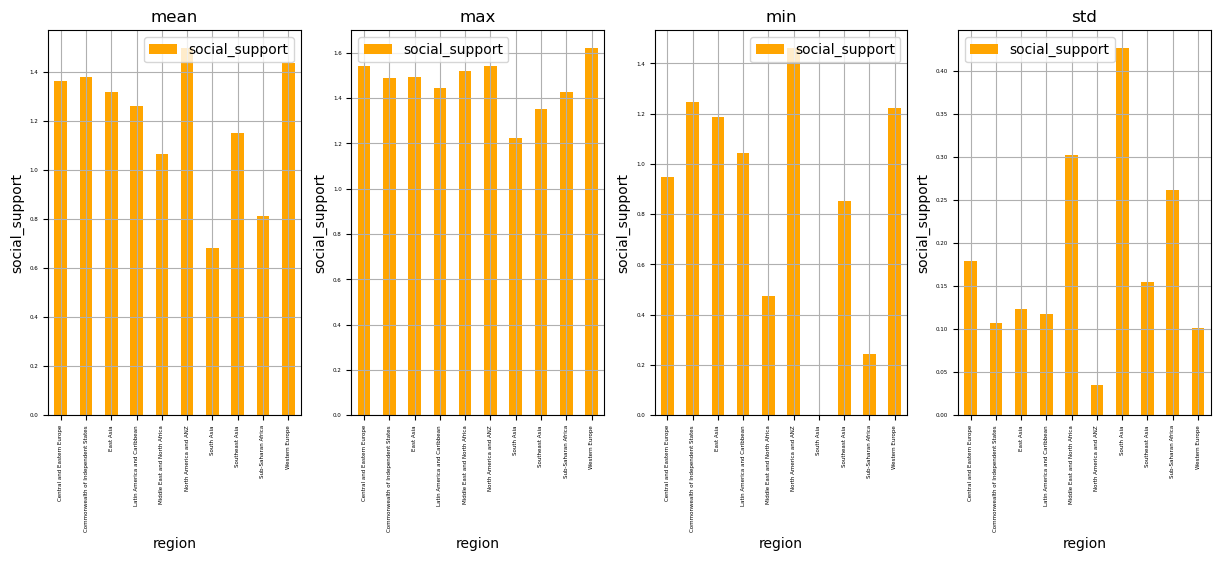

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_social_mean_df.plot(title='mean', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="social_support", color="orange")
region_social_max_df.plot(title='max', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="social_support", color="orange")
region_social_min_df.plot(title='min', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="social_support", color="orange")
region_social_std_df.plot(title='std', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="social_support", color="orange")

### 📃2023 지역별 사회적 지지 통계 분석 보고서 
#### 📊 지역별 사회적 지지 분석 결과  

##### 사회적 지지 정상치 범위 : 0.297 ~ 2.63

#### 📌 지역별 사회적 지지 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 평균 사회적 지지 분석 결과 가장 높게 나온 2개 지역들은 북미&오세아니아 지역이 '1.5'로 가장 높게 나왔고, 그 다음으로 서유럽 지역이 '1.43'으로 두번째로 높게 나왔습니다.
- 가장 지역별 사회적 지지 평균이 낮은 지역은 남아시아 지역으로 GDP 통계로 "0.68"이 나왔으며, 그 다음으로 사회적 지지 평균이 낮은 지역은 사하라 이남 아프리카 지역 이고, 사회적 지지 통계가 "0.81"으로 나왔습니다.

#### 📌 지역별 사회적 지지 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 사회적 지지의 최대값 분석 결과로는 서유럽이 "1.62"로 가장 높았고, 이 "1.62"이라는 사회적지지의 국가는 아이슬란인 것을 알 수 있었습니다.
- 반면 사회적지지 통계의 최소값이 가장 낮은 지역은 남아시아 지역이였으며 "0.00"의 결과값이 나왔습니다. 이 "0.00"이라는 사회적지지의 국가는 아프가니스탄 인 것을 데이터 분석을 통해 알 수 있었습니다.
  
#### 📌 지역별 사회적 지지 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 사회적 지지 분석 결과중 표준편차가 가장 높게 나온 지역은 남아시아 지역 이였으며, 표준편차값(std)이  "0.42"가 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 중동,북아프리카 지역 이며, "0.3"이라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역 & 오세아니아 지역이며, 표준편차 값은 "0.03"이 나왔으며, 그 다음으로 낮게 나온 지역은 서유럽으로 표준편차 값이 "0.1"이 나왔습니다.


<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

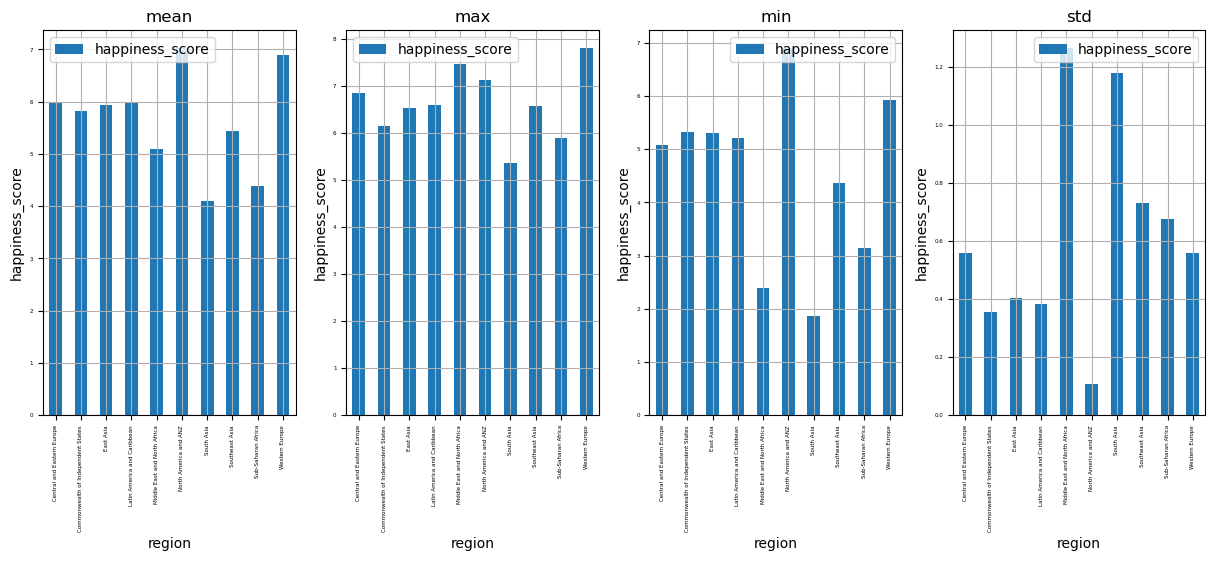

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="happiness_score")
region_happy_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
region_happy_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="happiness_score")
region_happy_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="happiness_score")
# region_happy_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='line', grd=True, ax=axes[2], ylabel="happiness_score")
# happiness_max_df.plot(title='max', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="score")
# happiness_std_df.plot(title='std', x='income', y='score', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="score")


### ❤️ 2023 지역별 행복도 조사 보고서 
#### 📊 행복도 분석 결과  

##### 행복도 지수 정상치 범위 : 2.309 ~ 8.749  

#### 📌 지역별 행복도 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 행복도 분석 결과 평균적으로 북아메리카가 "7.01"로 가장 높았고, 그 다음으로 서유럽이 "6.89"로 높은 것을 알 수 있습니다.
- 가장 행복도 지수 평균이 낮은 지역은 남아시아로 행복지수가 "4.09"이며, 그 다음으로 행복도가 낮은 대륙은 사하라 이남 아프리카이고, 행복지수가 "4.38"로 나왔습니다.

#### 📌 지역별 행복도 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 행복도의 최대값 분석 결과로는 서유럽이 "7.80"로 가장 높았고, 이 "7.80"이라는 행복지수의 국가는 핀란드인 것을 알 수 있었습니다.
- 반면 행복도 지수의 최소값이 가장 낮은 지역은 남아시아 였으며 "1.86"의 결과값이 나왔습니다. 이 "1.86"이라는 행복지수의 국가는 아프가니스탄이라는 것을 알 수 있었습니다.
  
#### 📌 지역별 행복도 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 행복도 분석 결과중 표준편차가 가장 높게 나온 지역은 중동과 북아프리카 지역 이였으며, 표준편차값(std)이  "1.26"이 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 동남아시아 이며, "1.18"이라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역이며, 표준편차 값은	"0.109"이 나왔습니다.

Text(1.7, 1.1, 'Happiness Average')

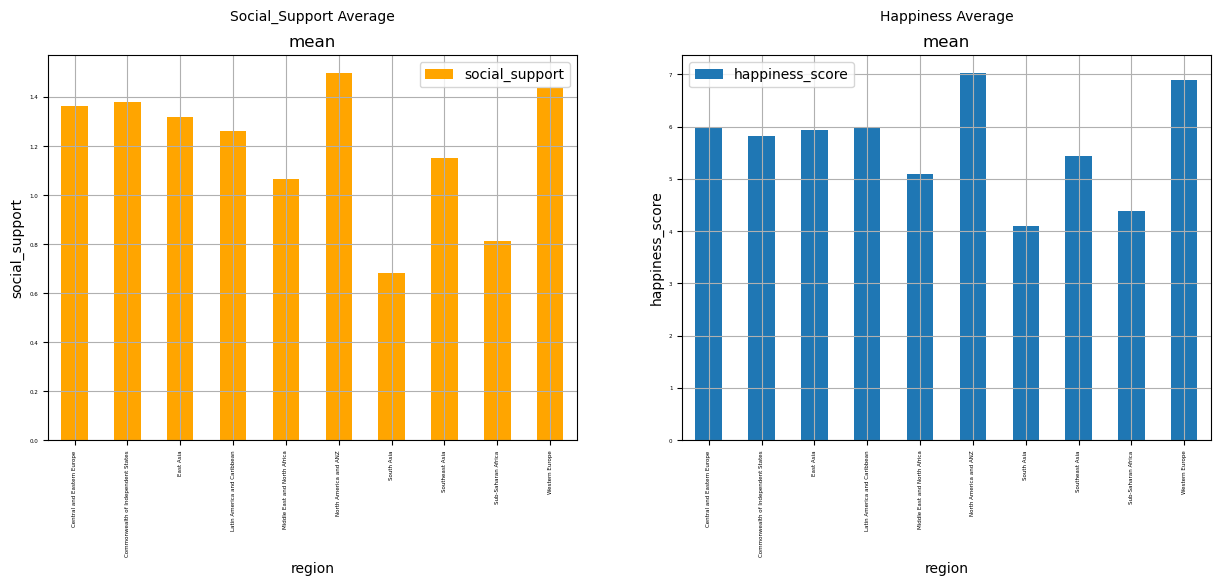

In [91]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

region_social_mean_df.plot(title='mean', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="social_support", color='orange')
axes[0].text(0.5, 1.10, 'Social_Support Average', ha='center', va='center', transform=axes[0].transAxes)

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
axes[0].text(1.7, 1.10, 'Happiness Average', ha='center', va='center', transform=axes[0].transAxes)

### 📈 2023 지역별 사회적지지에 따른 지역별 행복도 조사 보고서  
- 지역별 사회적지지 데이터와 지역별 행복도 데이터를 분석 결과 지역별 사회적지지가 높을 수록 지역별 행복도도 높아진다는 것을
  평균값으로 데이터를 추출해보니 알 수 있 게 되었습니다.

- 위 그래프를 보면 사회적지지 평균이 가장 높은 지역은 북아메리카 지역 및 오세아니아, 서유럽 이며, 지역별 행복도 또한 서유럽과 북아메리카 지역 & 오세아니아 지역이 가장 높은 것을 볼 수 있다. 반면에 사회적지지 평균이 가장 낮은 지역인 사하라 이남 아프리카 지역과 남 아시아 지역 또한 지역별 행복도에서도 마찬가지로 최하위 2개 지역으로 통계가 나왔습니다.

- 따라서 주어진 통계 자료를 종합해보면, 사회적 지지율이 높은 지역에서는 행복도도 높을 것으로 예상되며, 사회적 지지율이 덜 된 지역에서는 행복도가 낮을 것으로 판단됩니다. 이는 사회적 지지와 행복도 사이에 많은 관련성이 있음을 시사합니다.

<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

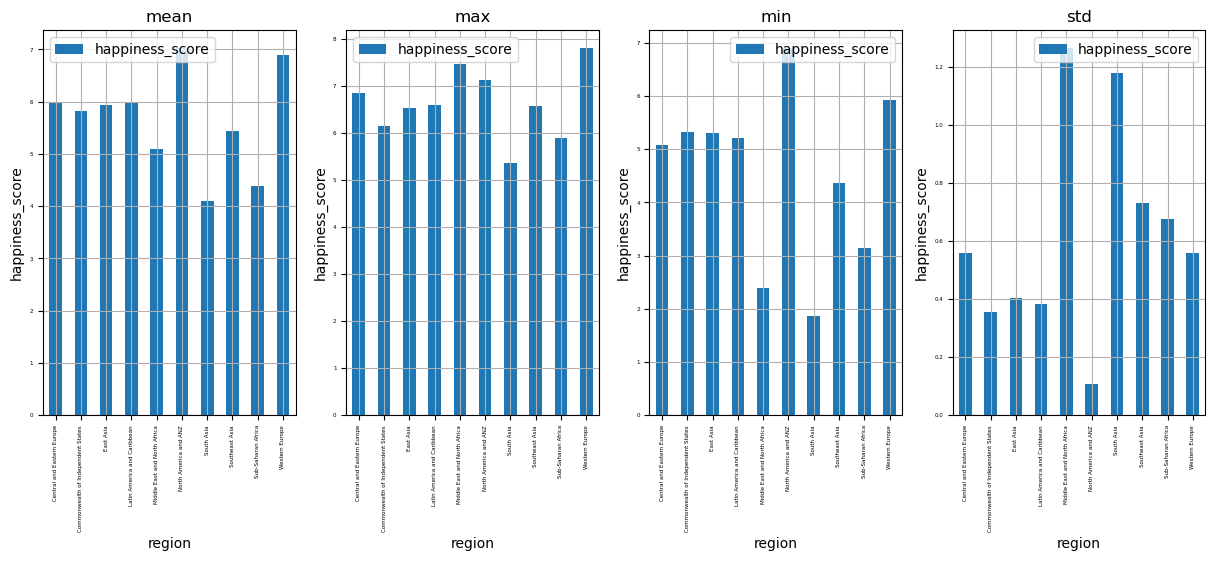

In [92]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="happiness_score")
region_happy_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
region_happy_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="happiness_score")
region_happy_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="happiness_score")

### ❤️ 2023 지역별 행복도 조사 보고서 
#### 📊 행복도 분석 결과  

##### 행복도 지수 정상치 범위 : 2.309 ~ 8.749  

#### 📌 지역별 행복도 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 행복도 분석 결과 평균적으로 북아메리카가 "7.01"로 가장 높았고, 그 다음으로 서유럽이 "6.89"로 높은 것을 알 수 있습니다.
- 가장 행복도 지수 평균이 낮은 지역은 남아시아로 행복지수가 "4.09"이며, 그 다음으로 행복도가 낮은 대륙은 사하라 이남 아프리카이고, 행복지수가 "4.38"로 나왔습니다.

#### 📌 지역별 행복도 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 행복도의 최대값 분석 결과로는 서유럽이 "7.80"로 가장 높았고, 이 "7.80"이라는 행복지수의 국가는 핀란드인 것을 알 수 있었습니다.
- 반면 행복도 지수의 최소값이 가장 낮은 지역은 남아시아 였으며 "1.86"의 결과값이 나왔습니다. 이 "1.86"이라는 행복지수의 국가는 아프가니스탄이라는 것을 알 수 있었습니다.
  
#### 📌 지역별 행복도 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 행복도 분석 결과중 표준편차가 가장 높게 나온 지역은 중동과 북아프리카 지역 이였으며, 표준편차값(std)이  "1.26"이 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 동남아시아 이며, "1.18"이라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역이며, 표준편차 값은	"0.109"이 나왔습니다.

<Axes: title={'center': 'std'}, xlabel='region', ylabel='gdp_per_capita'>

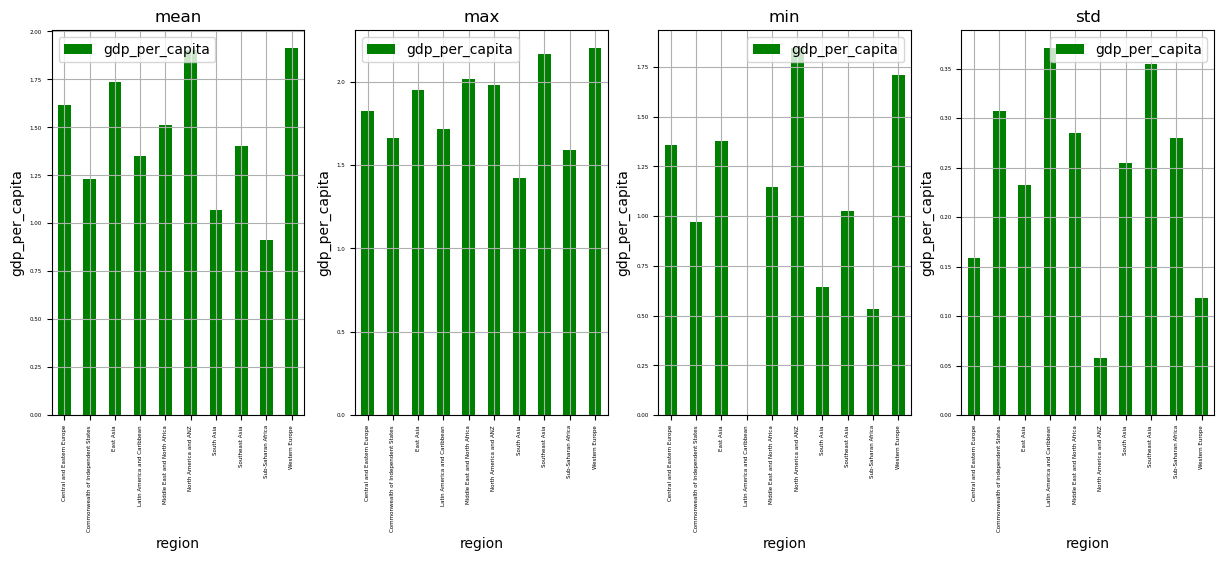

In [96]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

region_mean_gdp_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="gdp_per_capita" ,color="green")
region_max_gdp_df.plot(title='max', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="gdp_per_capita" ,color="green")
region_min_gdp_df.plot(title='min', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="gdp_per_capita" ,color="green")
region_std_gdp_df.plot(title='std', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="gdp_per_capita" ,color="green")

### 💰2023 지역별 GDP(1인당 국내 총생산) 보고서 
#### 📊 GDP 분석 결과  

##### GDP 정상치 범위 : 0.05 ~ 2.84

#### 📌 지역별 GDP 분석 결과 <평균(mean) 데이터 분석> 
- 지역별 평균 GDP 분석 결과 가장 높게 나온 2개 지역들은 서유럽 "1.91"로 가장 높았고, 그 다음으로 북미 지역 & 오세아니아 지역이 "1.9"으로 높게 나왔습니다.
- 가장 지역별 GDP 평균이 낮은 지역은 사하라 이남 아프리카 지역으로 GDP 통계로 "0.91"이 나왔으며, 그 다음으로 GDP 평균이 낮은 지역은 동남 아시아이고, GDP 통계가 "1.06"으로 나왔습니다.

#### 📌 지역별 GDP 분석 결과 <최대(max) & 최소(min) 데이터 분석>
- 지역별 GDP 통계의 최대값 분석 결과로는 서유럽이 "2.2"로 가장 높았고, 이 "2.2"이라는 GDP의 국가는 룩셈부르크인 것을 알 수 있었습니다.
- 반면 GDP 통계의 최소값이 가장 낮은 지역은 라틴아메리카,카리브해 지역이였으며 "0.00"의 결과값이 나왔습니다. 이 "0.00"이라는 GDP의 국가는 베네수엘라 인 것을 데이터 분석을 통해 알 수 있었습니다.
  
#### 📌 지역별 GDP 분석 결과 <표준편차(std) 데이터 분석>
- 지역별 GDP 분석 결과중 표준편차가 가장 높게 나온 지역은 라틴아메리카,카리브해 지역 이였으며, 표준편차값(std)이  "0.37"이 나왔습니다. 그 다음 표준편차 값이 높게 나온 지역은 서남아시아 이며, "0.35"라는 결과값이 나왔습니다. 반면 표준편차 값이 가장 낮게 나온 지역은 북아메리카 지역 & 오세아니아 지역이며, 표준편차 값은	"0.05"가 나왔으며, 그 다음으로 낮게 나온 지역은 서유럽으로 표준편차 값이 "0.12"가 나왔습니다.

Text(1.7, 1.1, 'Happiness Average')

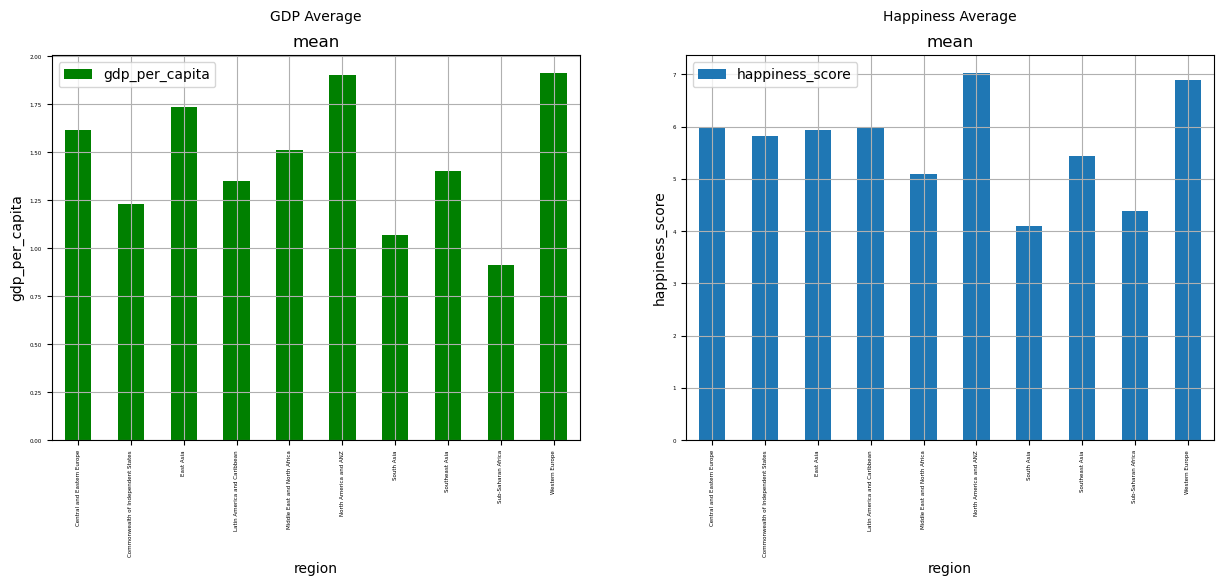

In [97]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

region_mean_gdp_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="gdp_per_capita", color="green")
axes[0].text(0.5, 1.10, 'GDP Average', ha='center', va='center', transform=axes[0].transAxes)

region_happy_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
axes[0].text(1.7, 1.10, 'Happiness Average', ha='center', va='center', transform=axes[0].transAxes)

### 📈 2023 지역별 평균 GDP 통계에 따른 행복도 조사 보고서  
- 지역별 GDP 데이터와 지역별 행복도 데이터를 분석 결과 지역별 GDP가 높을 수록 지역별 행복도도 높아진다는 것을
  평균값으로 데이터를 추출해보니 알 수 있 게 되었다.

- 위 그래프를 보면 GDP 평균이 가장 높은 지역은 서유럽,북아메리카 지역 및 오세아니아 이며, 지역별 행복도 또한 서유럽과 북아메리카 지역 & 오세아니아 지역이 가장 높은 것을 볼 수 있다. 반면에 GDP 평균이 가장 낮은 지역인 사하라 이남 아프리카 지역과 동남 아시아 지역 또한 지역별 행복도에서도 마찬가지로 최하위 2개 지역으로 통계가 나왔다.

- 따라서 주어진 통계 자료를 종합해보면, 경제적 발전 수준이 높은 지역에서는 행복도도 높을 것으로 예상되며, 경제적으로 발전이 덜 된 지역에서는 행복도가 낮을 것으로 판단됩니다. 이는 경제와 행복도 사이에 어느 정도의 관련성이 있음을 시사합니다.

In [99]:
top_happy = happiness_df[happiness_df['gdp_per_capita'] > 2]
# GDP가 가장 높은 나라는 룩셈부르크: 2.200
bottom_happy = happiness_df[happiness_df['gdp_per_capita'] < 0.05]
# GDP가 가장 낮은 나라는 Venezuela : 0.00
top_social = happiness_df[happiness_df['social_support'] > 1.6]
# 사회적 지지가 가장 높은 나라는 아이슬란드 -> 1.62
bottom_social = happiness_df[happiness_df['social_support'] < 0.1]
# 사회적 지지가 가장 낮은 나라는 아프가니스탄 -> 0.0
display(top_social)
display(bottom_social)
display(top_happy)
display(bottom_happy)

In [101]:
happiness_df.isna().sum()
happiness_df['healthy_life_expectancy'].value_counts()
# 결측치가 있는 행 제거
happiness_df.dropna(subset=['healthy_life_expectancy'], inplace=True)

# 결측치를 평균값으로 대체
mean_healthy_life_expectancy = happiness_df['healthy_life_expectancy'].mean()
result = happiness_df['healthy_life_expectancy'].fillna(mean_healthy_life_expectancy, inplace=True)
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
